In [2]:
#importing the dataset 
import pandas as pd
import numpy as np

file_path = r'C:\Users\Samhitha Shambavi\Downloads\archive (14)\BBProducts.csv'
BBdata = pd.read_csv(file_path)
BBdata

index                                            product  \
0          1             Garlic Oil - Vegetarian Capsule 500 mg   
1          2                              Water Bottle - Orange   
2          3                     Brass Angle Deep - Plain, No.2   
3          4  Cereal Flip Lid Container/Storage Jar - Assort...   
4          5                 Creme Soft Soap - For Hands & Body   
...      ...                                                ...   
27550  27551         Wottagirl! Perfume Spray - Heaven, Classic   
27551  27552                                           Rosemary   
27552  27553                       Peri-Peri Sweet Potato Chips   
27553  27554                          Green Tea - Pure Original   
27554  27555                     United Dreams Go Far Deodorant   

                     category              sub_category  \
0            Beauty & Hygiene                 Hair Care   
1      Kitchen, Garden & Pets     Storage & Accessories   
2        Cleaning & Household               Pooja Needs   
3        Cleaning & Household      Bins & Bathroom Ware   
4            Beauty & Hygiene          Bath & Hand Wash   
...                       ...                       ...   
27550        Beauty & Hygiene         Fragrances & Deos   
27551    Gourmet & World Food    Cooking & Baking Needs   
27552    Gourmet & World Food  Snacks, Dry Fruits, Nuts   
27553               Beverages                       Tea   
27554        Beauty & Hygiene            Men's Grooming   

                            brand  sale_price  market_price  \
0               Sri Sri Ayurveda       220.00         220.0   
1                      Mastercook      180.00         180.0   
2                             Trm      119.00         250.0   
3                          Nakoda      149.00         176.0   
4                           Nivea      162.00         162.0   
...                           ...         ...           ...   
27550                      Layerr      199.20         249.0   
27551                    Puramate       67.50          75.0   
27552                      FabBox      200.00         200.0   
27553                      Tetley      396.00         495.0   
27554  United Colors Of Benetton       214.53         390.0   

                           type  rating  \
0              Hair Oil & Serum     4.1   
1        Water & Fridge Bottles     2.3   
2               Lamp & Lamp Oil     3.4   
3      Laundry, Storage Baskets     3.7   
4          Bathing Bars & Soaps     4.4   
...                         ...     ...   
27550                   Perfume     3.9   
27551  Herbs, Seasonings & Rubs     4.0   
27552            Nachos & Chips     3.8   
27553                  Tea Bags     4.2   
27554          Men's Deodorants     4.5   

                                             description  
0      This Product contains Garlic Oil that is known...  
1      Each product is microwave safe (without lid), ...  
2      A perfect gift for all occasions, be it your m...  
3      Multipurpose container with an attractive desi...  
4      Nivea Creme Soft Soap gives your skin the best...  
...                                                  ...  
27550  Layerr brings you Wottagirl Classic fragrant b...  
27551  Puramate rosemary is enough to transform a dis...  
27552  We have taken the richness of Sweet Potatoes (...  
27553  Tetley Green Tea with its refreshing pure, ori...  
27554  The new mens fragrance from the United Dreams ...  

[27555 rows x 10 columns]

In [3]:
!pip install pandas numpy nltk scikit-learn
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Exploratory Data analysis (EDA)

### 1. Data Summary and Structure

#### a. View Dataset Shape and Data Types


In [4]:
# View the shape of the dataset
print("Shape of the dataset:", BBdata.shape)

# View data types of each column
print("\nData types of each column:\n", BBdata.dtypes)


Shape of the dataset: (27555, 10)

Data types of each column:
 index             int64
product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
dtype: object


#### b. missing values 

In [5]:
# Check for missing values in the dataset
missing_values = BBdata.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64


#### c.Basic statistics 

In [6]:
# Display basic statistics for numerical columns
basic_stats = BBdata.describe()
print("\nBasic statistics of numerical columns:\n", basic_stats)



Basic statistics of numerical columns:
              index    sale_price  market_price        rating
count  27555.00000  27555.000000  27555.000000  18929.000000
mean   13778.00000    322.514808    382.056664      3.943410
std     7954.58767    486.263116    581.730717      0.739063
min        1.00000      2.450000      3.000000      1.000000
25%     6889.50000     95.000000    100.000000      3.700000
50%    13778.00000    190.000000    220.000000      4.100000
75%    20666.50000    359.000000    425.000000      4.300000
max    27555.00000  12500.000000  12500.000000      5.000000


In [7]:
import pandas as pd


# 1. Fill missing values for 'product' and 'brand' with 'Unknown'
BBdata['product'].fillna('Unknown', inplace=True)
BBdata['brand'].fillna('Unknown', inplace=True)

# 2. Drop the 'rating' column
BBdata.drop(columns=['rating'], inplace=True)

# 3. Fill missing values in 'description' with 'No description'
BBdata['description'].fillna('No description', inplace=True)

# Verify if there are any remaining missing values
missing_values_updated = BBdata.isnull().sum()
print("\nUpdated missing values in each column:\n", missing_values_updated)

# Verify the DataFrame shape to ensure the 'rating' column was dropped
print("\nShape of the updated dataset:", BBdata.shape)



Updated missing values in each column:
 index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
description     0
dtype: int64

Shape of the updated dataset: (27555, 9)


### 2. Category Distribution

#### a. Distribution of Categories and Sub-Categories


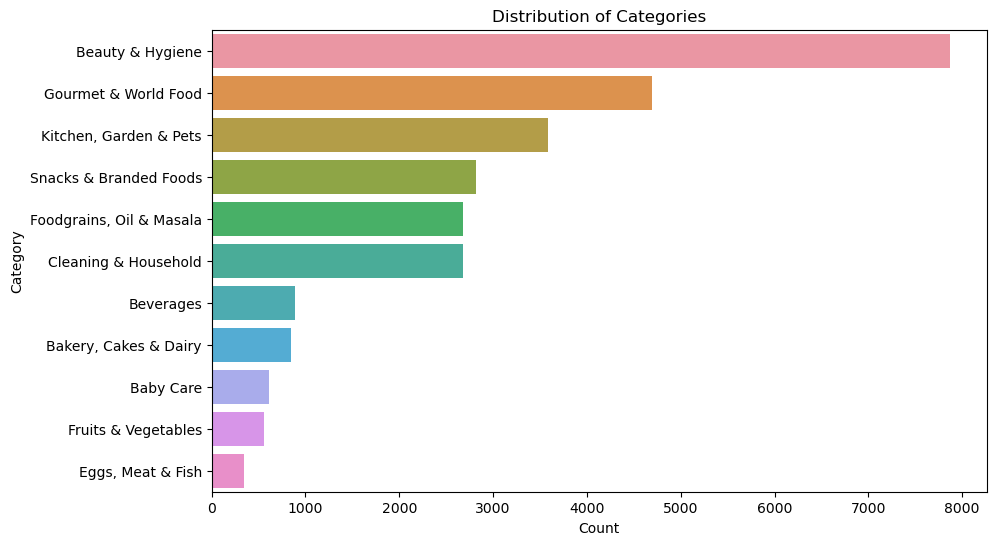

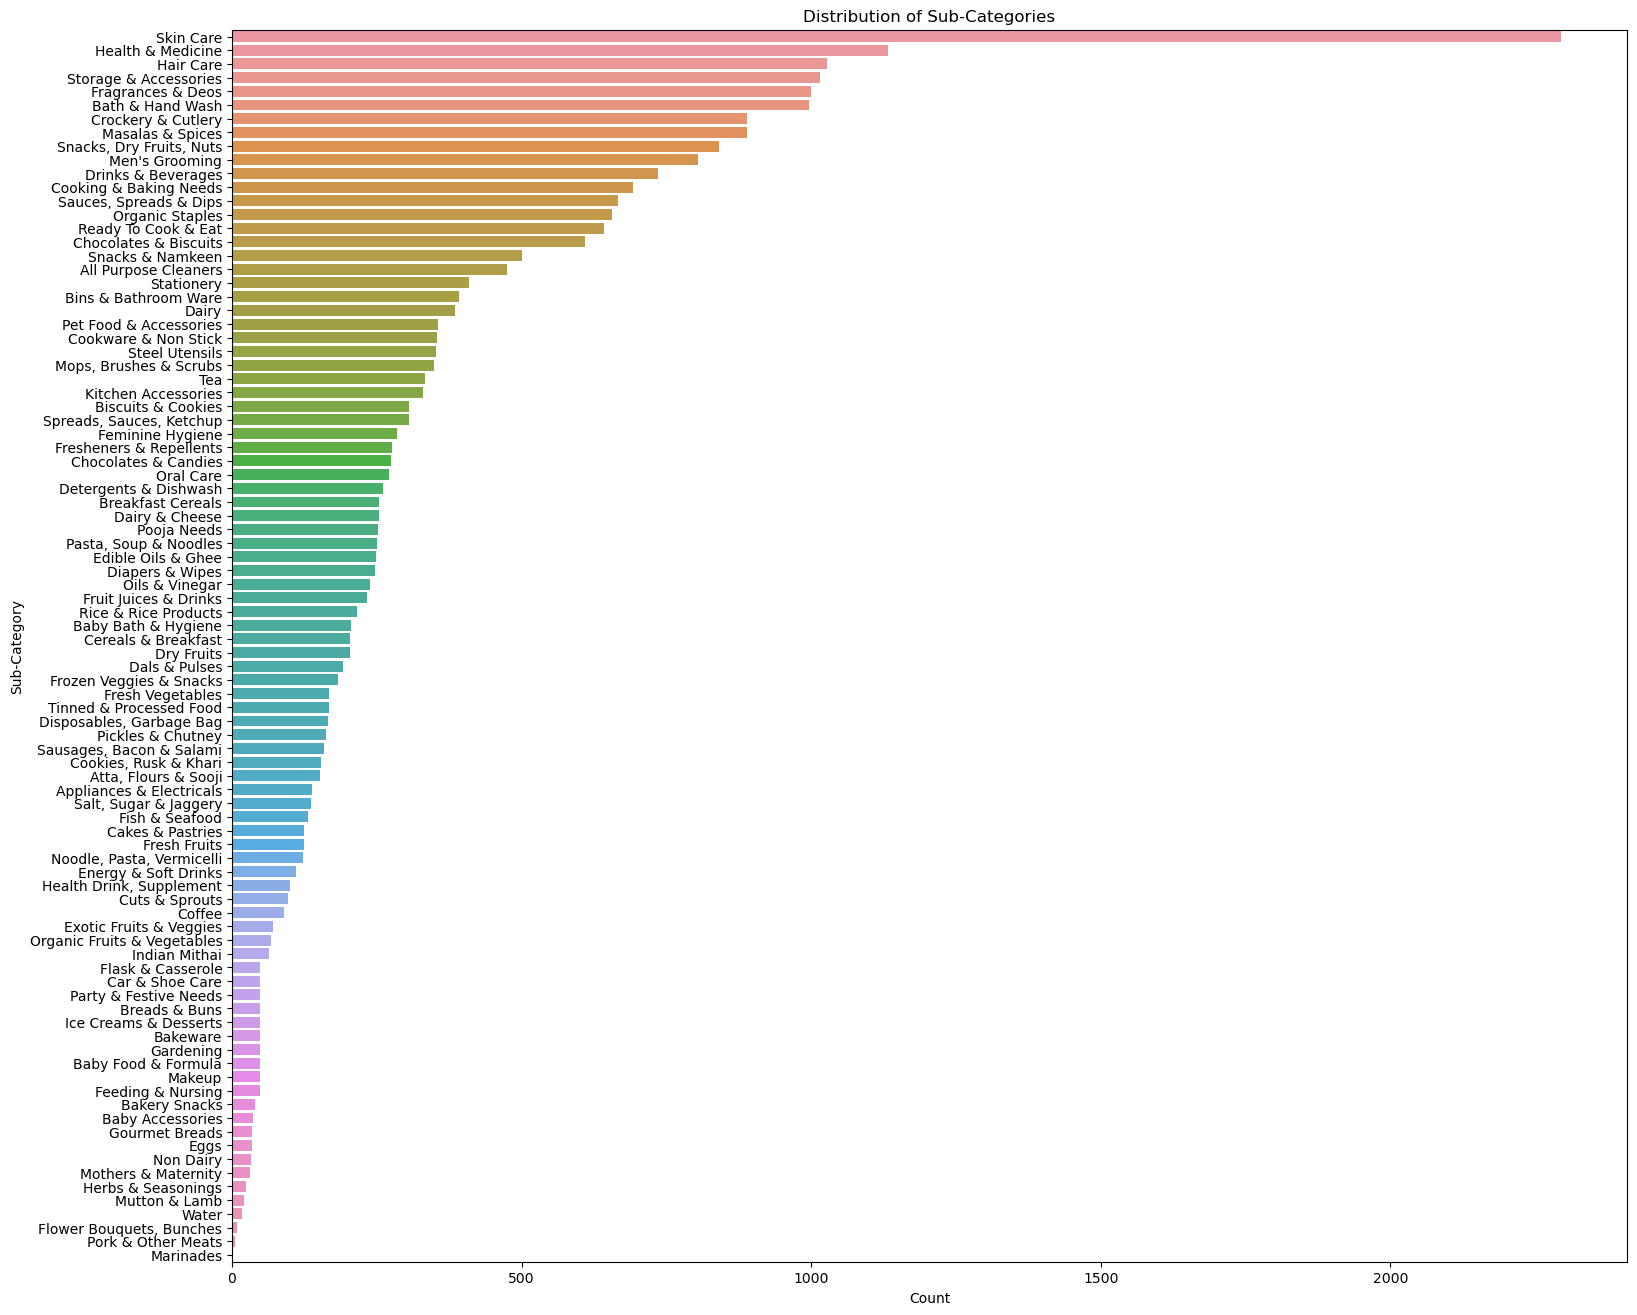

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=BBdata, order=BBdata['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Plot distribution of sub-categories
plt.figure(figsize=(18, 16))
sns.countplot(y='sub_category', data=BBdata, order=BBdata['sub_category'].value_counts().index)
plt.title('Distribution of Sub-Categories')
plt.xlabel('Count')
plt.ylabel('Sub-Category')
plt.show()


#### b. Category Imbalance


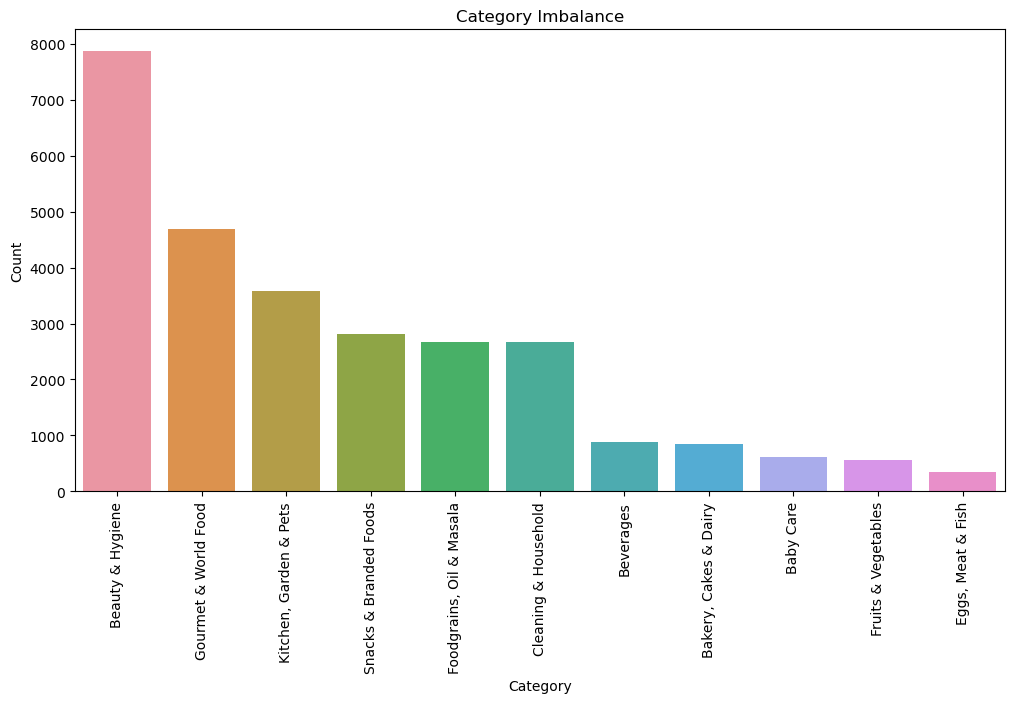

Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: category, dtype: int64


In [9]:
# Check for class imbalance
category_counts = BBdata['category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Category Imbalance')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
print (category_counts)

### 3. Text Analysis of Descriptions


#### a. Word Cloud


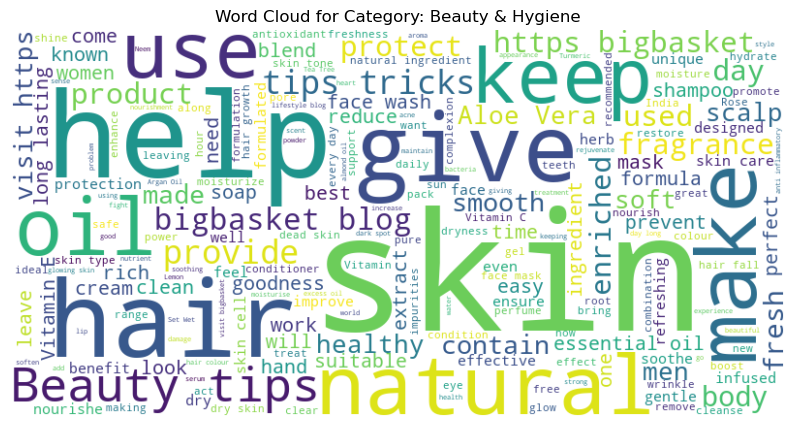

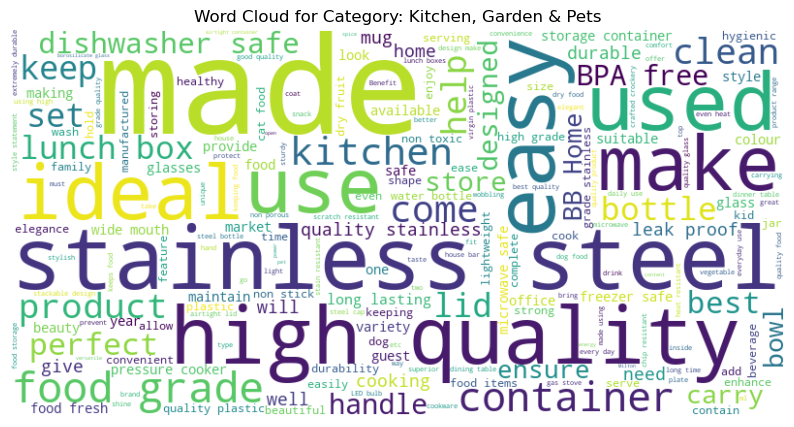

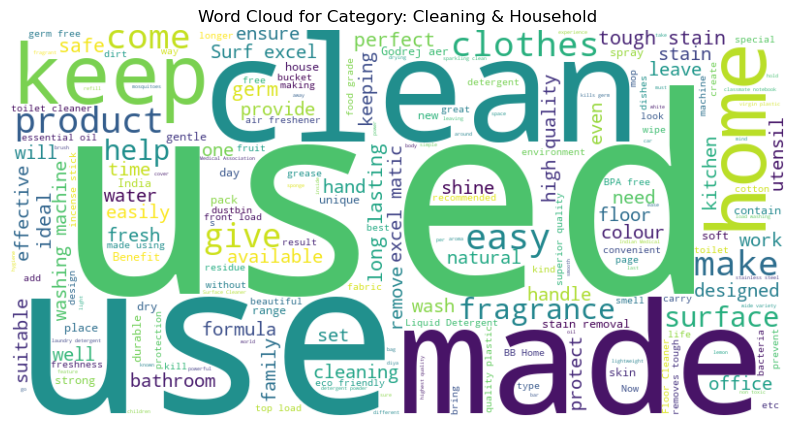

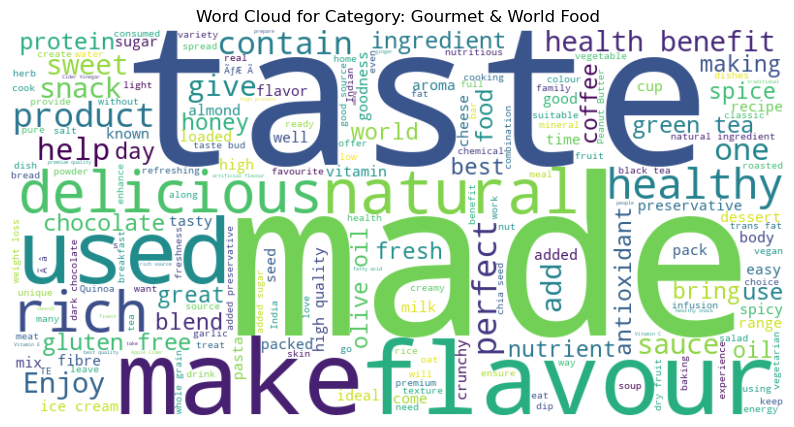

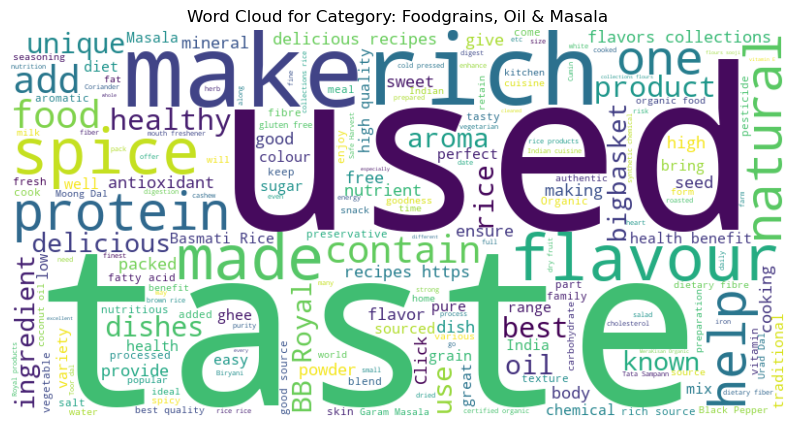

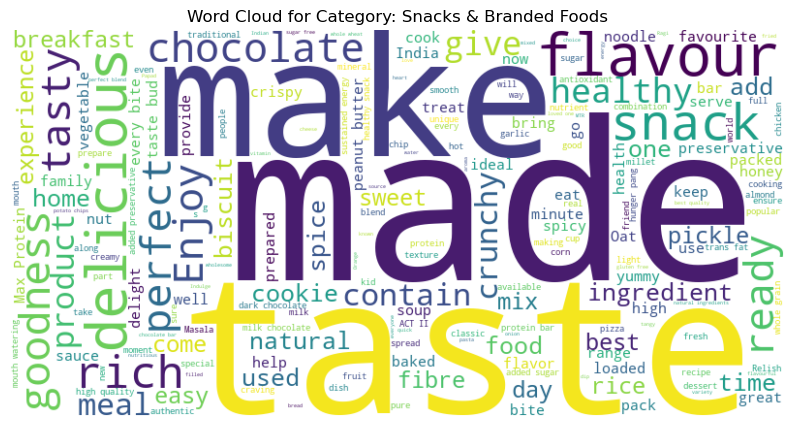

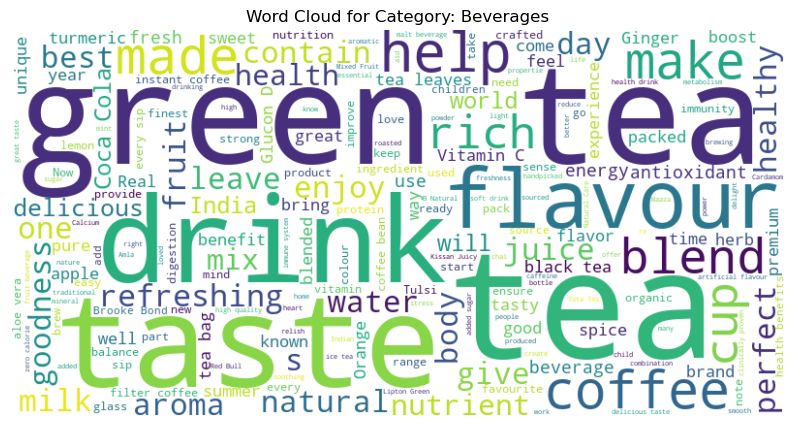

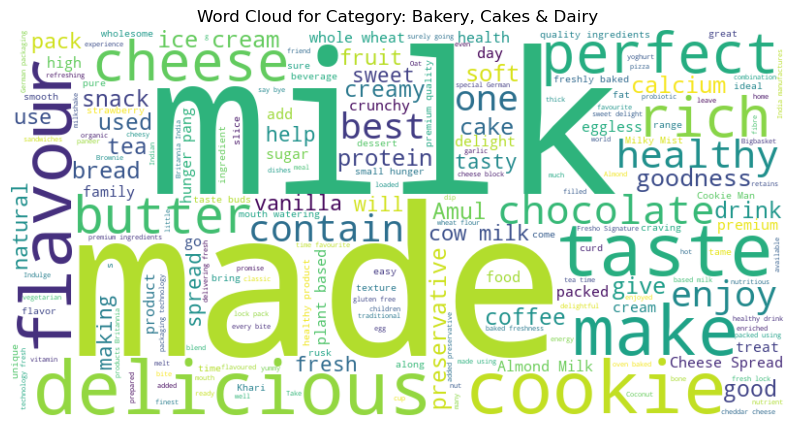

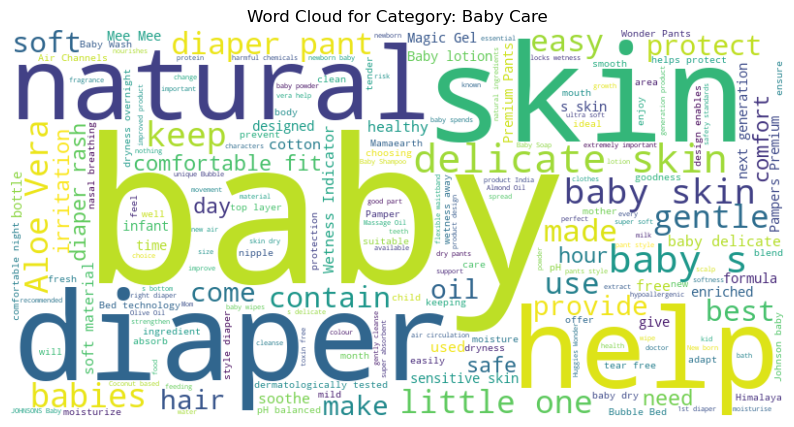

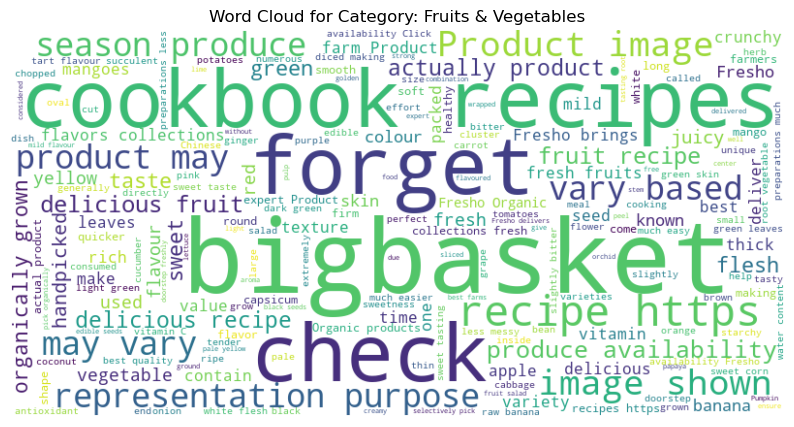

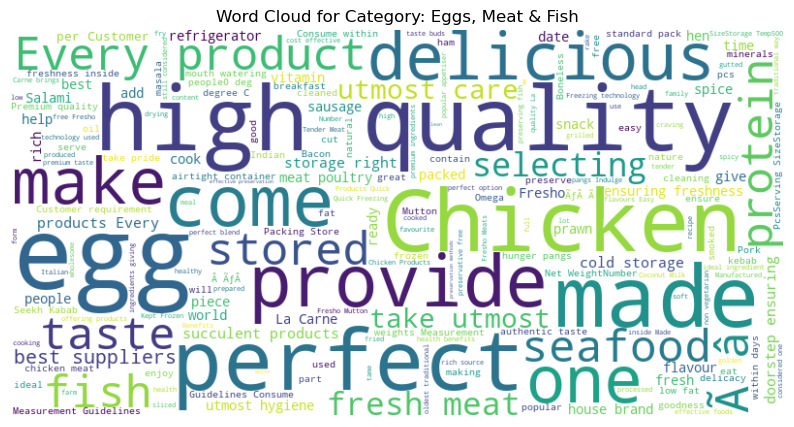

In [10]:
from wordcloud import WordCloud

# Generate a word cloud for each category
for category in BBdata['category'].unique():
    text = " ".join(description for description in BBdata[BBdata['category'] == category]['description'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Category: {category}')
    plt.show()

#### b. N-grams Analysis


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# Function to generate n-grams
def generate_ngrams(text, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(text)
    ngrams_counts = ngrams.sum(axis=0).A1
    ngrams_vocab = vectorizer.get_feature_names_out()
    return pd.DataFrame({'ngram': ngrams_vocab, 'count': ngrams_counts}).sort_values(by='count', ascending=False)

# Generate unigrams, bigrams, and trigrams
descriptions = BBdata['description'].dropna().tolist()
unigrams = generate_ngrams(descriptions, n=1)
bigrams = generate_ngrams(descriptions, n=2)
trigrams = generate_ngrams(descriptions, n=3)

print("Top Unigrams:\n", unigrams.head(10))
print("\nTop Bigrams:\n", bigrams.head(10))
print("\nTop Trigrams:\n", trigrams.head(10))


Top Unigrams:
       ngram  count
2073    and  97519
26043   the  79696
18207    of  52884
13738    is  47117
26349    to  44918
13781    it  35035
28509  with  34250
13128    in  31484
10559   for  30880
28789  your  26069

Top Bigrams:
             ngram  count
174324      it is  11708
226260     of the   6949
163772     in the   5135
361489   with the   4307
55559      can be   3665
323337   the skin   3520
132497   from the   3025
172238    is made   2921
367873  your skin   2920
334247     to the   2912

Top Trigrams:
                        ngram  count
127116           can be used   1823
663105       the goodness of   1238
95563     beauty tips tricks   1130
694301      tips tricks more   1130
253564       for beauty tips   1122
328132  https bigbasket blog   1104
489629            one of the   1084
361267          is made from    979
367403             it can be    902
764877     with the goodness    774


#### c. Text Length Distribution


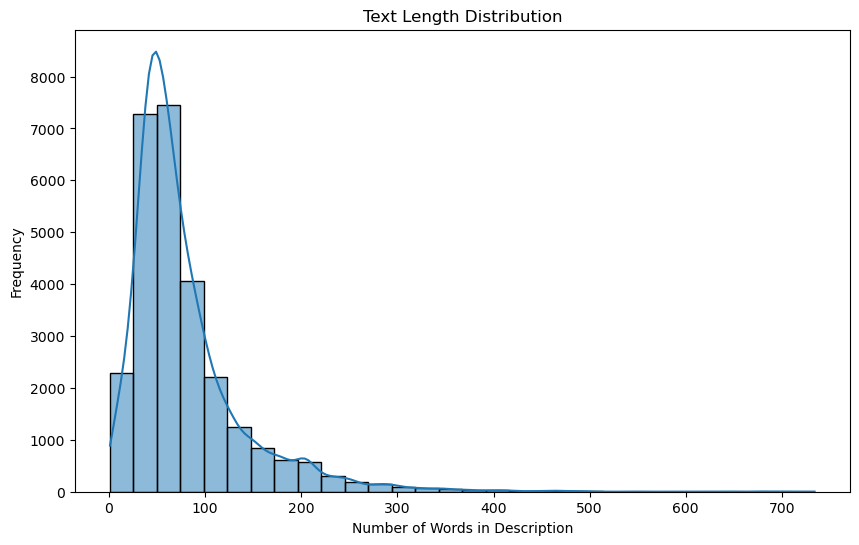

In [12]:
# Calculate the length of each description
BBdata['description_length'] = BBdata['description'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(BBdata['description_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words in Description')
plt.ylabel('Frequency')
plt.show()

### Feature Interactions

#### a. Feature Cross Tabulations


In [13]:
# Create a cross-tabulation of 'brand' vs. 'category'
cross_tab = pd.crosstab(BBdata['brand'], BBdata['category'])
print("\nCross Tabulation of Brand vs. Category:\n", cross_tab.head())




Cross Tabulation of Brand vs. Category:
 category    Baby Care  Bakery, Cakes & Dairy  Beauty & Hygiene  Beverages  \
brand                                                                       
&Me                 0                      0                 0          3   
&Stirred            0                      0                 0          5   
109°F               0                      0                 1          0   
137 Degree          0                      0                 0          0   
18 Herbs            0                      0                 6         20   

category    Cleaning & Household  Eggs, Meat & Fish  Foodgrains, Oil & Masala  \
brand                                                                           
&Me                            0                  0                         0   
&Stirred                       0                  0                         0   
109°F                          0                  0                         0   
137 Degree   

## Preprocessing code 

In [14]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

# Downloading NLTK data files
nltk.download('stopwords')

df = BBdata.copy()

# Handling missing values
df['description'] = df['description'].fillna('No description') 
df['product'] = df['product'].fillna('Unknown')  
df['brand'] = df['brand'].fillna('Unknown')  

# Converting to lowercase
df['description'] = df['description'].str.lower()

# Removing special characters and numbers
df['description'] = df['description'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))

# Tokenization and removing stopwords
stop_words = set(stopwords.words('english'))
df['description'] = df['description'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Split the dataset into training and testing sets
X = df['description']  
y = df['category'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed.")


[nltk_data] Downloading package stopwords to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data preprocessing completed.


## baseline model with multilabel classifcation

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

# Sample data preparation
df = BBdata.copy()

# Convert category column to list of labels for multi-label classification
# Assuming 'category' contains multiple labels separated by commas
df['category'] = df['category'].apply(lambda x: x.split(','))

# Convert labels to binary format
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['category'])

# Prepare features
X = df['description'].fillna('')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize a multi-output classifier with a base classifier
multi_target_model = MultiOutputClassifier(LogisticRegression(max_iter=1000))

# Train the model
multi_target_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = multi_target_model.predict(X_test_tfidf)

# Convert predictions and true values back to DataFrames for evaluation
y_pred_df = pd.DataFrame(y_pred, columns=mlb.classes_)
y_test_df = pd.DataFrame(y_test, columns=mlb.classes_)

# Print accuracy and classification report
accuracy = (y_pred_df == y_test_df).mean().mean()
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test_df, y_pred_df))


Accuracy: 0.9735317244299281
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.42      0.58       170
           1       0.97      0.88      0.92       749
           2       1.00      0.45      0.62        74
           3       0.94      0.67      0.78       539
           4       0.96      0.68      0.80       111
           5       0.92      0.42      0.58       170
           6       0.97      0.93      0.95      1500
           7       0.75      0.35      0.47       179
           8       0.97      0.76      0.86       546
           9       1.00      0.45      0.62        74
          10       0.94      0.67      0.78       539
          11       0.99      0.72      0.83       103
          12       0.84      0.66      0.74       963
          13       0.97      0.88      0.92       749
          14       0.85      0.53      0.65       577

   micro avg       0.94      0.74      0.83      7043
   macro avg       0.93    

C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Baseline model 

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

df = BBdata.copy()

# Prepare features and labels
X = df['description'].fillna('') 
y = df['category']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred = nb_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.812375249500998
Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.82      0.59      0.68       111
   Bakery, Cakes & Dairy       1.00      0.17      0.29       170
        Beauty & Hygiene       0.92      0.95      0.94      1500
               Beverages       0.86      0.28      0.43       179
    Cleaning & Household       0.92      0.83      0.87       546
       Eggs, Meat & Fish       0.93      0.35      0.51        74
Foodgrains, Oil & Masala       0.82      0.77      0.79       539
     Fruits & Vegetables       0.99      0.81      0.89       103
    Gourmet & World Food       0.61      0.88      0.72       963
  Kitchen, Garden & Pets       0.92      0.92      0.92       749
  Snacks & Branded Foods       0.73      0.68      0.70       577

                accuracy                           0.81      5511
               macro avg       0.87      0.66      0.70      5511
            weighted a

## Advanced model 1 (BERT )

In [20]:
import torch
print("CUDA available:", torch.cuda.is_available())


CUDA available: False


In [22]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=4, num_workers=4)


In [25]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import os

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=2000, random_state=42)  # Use a smaller subset for faster training

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)  # Reduced max_length for faster processing
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Define directory for saving checkpoints
checkpoint_dir = './results/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Updated TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,  # Reduced number of epochs for faster testing
    per_device_train_batch_size=2,  # Smaller batch size for CPU
    per_device_eval_batch_size=2,
    warmup_steps=100,  # Reduced warmup steps
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,  # More frequent logging
    save_steps=500,  # Save checkpoints more frequently
    evaluation_strategy="steps",
    eval_steps=500,  # Evaluate more frequently
    load_best_model_at_end=True,  # Load the best model at the end of training
    save_total_limit=3,  # Limit the number of saved checkpoints to the most recent 3
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train and save checkpoints
trainer.train()

# Evaluate
eval_results = trainer.evaluate()
print("BERT Model Evaluation Results:", eval_results)

# Prediction
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=1)

# Print classification report
print("BERT Model Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


BERT Model Evaluation Results: {'eval_loss': 1.0701069831848145, 'eval_runtime': 120.3689, 'eval_samples_per_second': 3.323, 'eval_steps_per_second': 1.662, 'epoch': 1.0}
BERT Model Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.00      0.00      0.00         9
   Bakery, Cakes & Dairy       0.00      0.00      0.00        15
        Beauty & Hygiene       0.83      0.90      0.86        96
               Beverages       0.71      0.26      0.38        19
    Cleaning & Household       0.76      0.74      0.75        43
       Eggs, Meat & Fish       0.00      0.00      0.00         5
Foodgrains, Oil & Masala       0.56      0.76      0.65        46
     Fruits & Vegetables       0.00      0.00      0.00         7
    Gourmet & World Food       0.46      0.71      0.56        73
  Kitchen, Garden & Pets       0.67      0.96      0.79        46
  Snacks & Branded Foods       0.62      0.12      0.20        41



C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import os

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=2000, random_state=42) 

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)  # Reduced max_length for faster processing
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Define directory for saving checkpoints
checkpoint_dir = './results/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Updated TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,  # Reduced number of epochs for faster testing
    per_device_train_batch_size=2,  # Smaller batch size for CPU
    per_device_eval_batch_size=2,
    warmup_steps=100,  # Reduced warmup steps
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,  # More frequent logging
    save_steps=500,  # Save checkpoints more frequently
    evaluation_strategy="steps",
    eval_steps=500,  # Evaluate more frequently
    load_best_model_at_end=True,  # Load the best model at the end of training
    save_total_limit=3,  # Limit the number of saved checkpoints to the most recent 3
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train and save checkpoints
trainer.train()

# Evaluate
eval_results = trainer.evaluate()
print("BERT Model Evaluation Results:", eval_results)

# Prediction
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=1)

# Print classification report
print("BERT Model Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


BERT Model Evaluation Results: {'eval_loss': 1.0156943798065186, 'eval_runtime': 127.7779, 'eval_samples_per_second': 3.13, 'eval_steps_per_second': 1.565, 'epoch': 3.0}
BERT Model Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.82      1.00      0.90         9
   Bakery, Cakes & Dairy       0.50      0.53      0.52        15
        Beauty & Hygiene       0.95      0.94      0.94        96
               Beverages       1.00      0.05      0.10        19
    Cleaning & Household       0.91      0.91      0.91        43
       Eggs, Meat & Fish       0.57      0.80      0.67         5
Foodgrains, Oil & Masala       0.83      0.76      0.80        46
     Fruits & Vegetables       0.75      0.86      0.80         7
    Gourmet & World Food       0.51      0.62      0.56        73
  Kitchen, Garden & Pets       0.98      0.93      0.96        46
  Snacks & Branded Foods       0.52      0.56      0.54        41

 

In [18]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import os

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=3000, random_state=42)  

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128) 
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Define directory for saving checkpoints
checkpoint_dir = './results/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Updated TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3, 
    per_device_train_batch_size=2,  
    per_device_eval_batch_size=2,
    warmup_steps=100, 
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50, 
    save_steps=500,  
    evaluation_strategy="steps",
    eval_steps=500,  
    load_best_model_at_end=True,  
    save_total_limit=3,  
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train and save checkpoints
trainer.train()

# Evaluate
eval_results = trainer.evaluate()
print("BERT Model Evaluation Results:", eval_results)

# Prediction
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=1)

# Print classification report
print("BERT Model Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


BERT Model Evaluation Results: {'eval_loss': 0.8345348834991455, 'eval_runtime': 220.1753, 'eval_samples_per_second': 2.725, 'eval_steps_per_second': 1.363, 'epoch': 3.0}
BERT Model Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.91      0.91      0.91        11
   Bakery, Cakes & Dairy       0.58      0.44      0.50        16
        Beauty & Hygiene       0.96      0.95      0.95       163
               Beverages       0.56      0.67      0.61        21
    Cleaning & Household       0.93      0.86      0.89        58
       Eggs, Meat & Fish       1.00      0.50      0.67         6
Foodgrains, Oil & Masala       0.80      0.86      0.83        56
     Fruits & Vegetables       0.86      1.00      0.92        12
    Gourmet & World Food       0.71      0.69      0.70       120
  Kitchen, Garden & Pets       0.94      0.96      0.95        83
  Snacks & Branded Foods       0.63      0.67      0.65        54



In [15]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import os

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=2000, random_state=42)  # Use a smaller subset for faster training

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)  # Reduced max_length for faster processing
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Define directory for saving checkpoints
checkpoint_dir = './results/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Updated TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=7,  # Reduced number of epochs for faster testing
    per_device_train_batch_size=2,  # Smaller batch size for CPU
    per_device_eval_batch_size=2,
    warmup_steps=100,  # Reduced warmup steps
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,  # More frequent logging
    save_steps=500,  # Save checkpoints more frequently
    evaluation_strategy="steps",
    eval_steps=500,  # Evaluate more frequently
    load_best_model_at_end=True,  # Load the best model at the end of training
    save_total_limit=3,  # Limit the number of saved checkpoints to the most recent 3
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train and save checkpoints
trainer.train()

# Evaluate
eval_results = trainer.evaluate()
print("BERT Model Evaluation Results:", eval_results)

# Prediction
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=1)

# Print classification report
print("BERT Model Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


BERT Model Evaluation Results: {'eval_loss': 1.035454511642456, 'eval_runtime': 144.5657, 'eval_samples_per_second': 2.767, 'eval_steps_per_second': 1.383, 'epoch': 7.0}
BERT Model Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.75      1.00      0.86         9
   Bakery, Cakes & Dairy       0.00      0.00      0.00        15
        Beauty & Hygiene       0.89      0.96      0.92        96
               Beverages       0.00      0.00      0.00        19
    Cleaning & Household       0.89      0.93      0.91        43
       Eggs, Meat & Fish       1.00      0.20      0.33         5
Foodgrains, Oil & Masala       0.62      0.72      0.67        46
     Fruits & Vegetables       0.38      0.43      0.40         7
    Gourmet & World Food       0.41      0.23      0.30        73
  Kitchen, Garden & Pets       0.88      0.91      0.89        46
  Snacks & Branded Foods       0.42      0.90      0.57        41

 

C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import os

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=4000, random_state=42)  

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)  # Reduced max_length for faster processing
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Define directory for saving checkpoints
checkpoint_dir = './results/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Updated TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,  # Reduced number of epochs for faster testing
    per_device_train_batch_size=2,  # Smaller batch size for CPU
    per_device_eval_batch_size=2,
    warmup_steps=100,  # Reduced warmup steps
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,  # More frequent logging
    save_steps=500,  # Save checkpoints more frequently
    evaluation_strategy="steps",
    eval_steps=500,  # Evaluate more frequently
    load_best_model_at_end=True,  # Load the best model at the end of training
    save_total_limit=3,  # Limit the number of saved checkpoints to the most recent 3
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train and save checkpoints
trainer.train()

# Train and save checkpoints
trainer.train(resume_from_checkpoint=True)

# Evaluate
eval_results = trainer.evaluate()
print("BERT Model Evaluation Results:", eval_results)

# Prediction
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=1)

# Print classification report
print("BERT Model Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\transformers\trainer.py:3098: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(os.path.join(checkpoint, OPTIMI

BERT Model Evaluation Results: {'eval_loss': 1.085880994796753, 'eval_runtime': 263.3532, 'eval_samples_per_second': 3.038, 'eval_steps_per_second': 1.519, 'epoch': 7.0}
BERT Model Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.81      0.93      0.87        14
   Bakery, Cakes & Dairy       0.68      0.65      0.67        26
        Beauty & Hygiene       0.94      0.95      0.94       208
               Beverages       0.75      0.72      0.73        25
    Cleaning & Household       0.92      0.93      0.92        71
       Eggs, Meat & Fish       0.86      0.67      0.75         9
Foodgrains, Oil & Masala       0.78      0.89      0.83        79
     Fruits & Vegetables       0.78      0.58      0.67        12
    Gourmet & World Food       0.73      0.72      0.73       146
  Kitchen, Garden & Pets       0.96      0.92      0.94       111
  Snacks & Branded Foods       0.75      0.75      0.75        99

 

### Advanced model 2 (RNN and LSTM)

In [ ]:
pip list | grep torch


In [ ]:
import torch
import transformers
import accelerate

print("Torch version:", torch.__version__)
print("Transformers version:", transformers.__version__)
print("Accelerate version:", accelerate.__version__)


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


In [20]:
!pip install torch transformers nltk


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import BertTokenizer
import nltk
from nltk.tokenize import word_tokenize
from torch.nn.utils.rnn import pad_sequence

nltk.download('punkt')

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=5000, random_state=42)

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# Tokenization using nltk
def tokenize_text(text):
    return word_tokenize(text.lower())

# Tokenize the training and testing data
X_train_tokenized = [tokenize_text(text) for text in X_train]
X_test_tokenized = [tokenize_text(text) for text in X_test]

# Build a vocabulary from the tokenized training data
vocab = set(token for sentence in X_train_tokenized for token in sentence)
vocab_size = len(vocab) + 1  # Adding 1 for padding
word_to_idx = {word: i+1 for i, word in enumerate(vocab)}  # Word to index mapping

# Convert tokens to indices
def tokens_to_indices(tokenized_sentences):
    return [[word_to_idx[token] for token in sentence if token in word_to_idx] for sentence in tokenized_sentences]

X_train_indices = tokens_to_indices(X_train_tokenized)
X_test_indices = tokens_to_indices(X_test_tokenized)

# Pad sequences to the same length
def pad_sequences(sequences, max_len):
    return pad_sequence([torch.tensor(seq[:max_len]) for seq in sequences], batch_first=True, padding_value=0)

max_len = 128  # Maximum length of sequences
X_train_padded = pad_sequences(X_train_indices, max_len)
X_test_padded = pad_sequences(X_test_indices, max_len)

# Convert to PyTorch tensors
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        output, hidden = self.rnn(x)
        hidden = hidden.squeeze(0)
        out = self.fc(hidden)
        return out

# Model parameters
embedding_dim = 128
hidden_dim = 64
output_dim = len(label_encoder.classes_)

# Initialize the model, loss function, and optimizer
model = RNNModel(vocab_size, embedding_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, X_train, y_train, num_epochs=5, batch_size=32):
    model.train()
    for epoch in range(num_epochs):
        permutation = torch.randperm(X_train.size()[0])
        for i in range(0, X_train.size()[0], batch_size):
            indices = permutation[i:i + batch_size]
            batch_X, batch_y = X_train[indices], y_train[indices]

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}")

# Train the model
train_model(model, X_train_padded, y_train_tensor)

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_padded)
    _, predicted = torch.max(outputs, 1)

print("RNN Model Classification Report:\n", classification_report(y_test_tensor, predicted, target_names=label_encoder.classes_))


[nltk_data] Downloading package punkt to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/5, Loss: 2.173201322555542
Epoch 2/5, Loss: 1.9516265392303467
Epoch 3/5, Loss: 1.818914532661438
Epoch 4/5, Loss: 2.2747690677642822
Epoch 5/5, Loss: 1.8976943492889404
RNN Model Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.00      0.00      0.00        18
   Bakery, Cakes & Dairy       0.00      0.00      0.00        33
        Beauty & Hygiene       0.27      0.98      0.42       264
               Beverages       0.50      0.05      0.08        22
    Cleaning & Household       0.40      0.04      0.07        97
       Eggs, Meat & Fish       0.00      0.00      0.00        16
Foodgrains, Oil & Masala       0.00      0.00      0.00       102
     Fruits & Vegetables       0.00      0.00      0.00        17
    Gourmet & World Food       0.29      0.04      0.07       171
  Kitchen, Garden & Pets       0.67      0.01      0.03       144
  Snacks & Branded Foods       0.00      0.00      0.00      

C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from torch.nn.utils.rnn import pad_sequence
import nltk
from nltk.tokenize import word_tokenize
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

nltk.download('punkt')

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=8000, random_state=42)

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# Tokenization using nltk
def tokenize_text(text):
    return word_tokenize(text.lower())

X_train_tokenized = [tokenize_text(text) for text in X_train]
X_test_tokenized = [tokenize_text(text) for text in X_test]

# Build vocabulary
vocab = set(token for sentence in X_train_tokenized for token in sentence)
vocab_size = len(vocab) + 1
word_to_idx = {word: i+1 for i, word in enumerate(vocab)}

# Convert tokens to indices
def tokens_to_indices(tokenized_sentences):
    return [[word_to_idx[token] for token in sentence if token in word_to_idx] for sentence in tokenized_sentences]

X_train_indices = tokens_to_indices(X_train_tokenized)
X_test_indices = tokens_to_indices(X_test_tokenized)

# Pad sequences
def pad_sequences(sequences, max_len):
    return pad_sequence([torch.tensor(seq[:max_len]) for seq in sequences], batch_first=True, padding_value=0)

max_len = 128
X_train_padded = pad_sequences(X_train_indices, max_len)
X_test_padded = pad_sequences(X_test_indices, max_len)

y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        output, (hidden, cell) = self.lstm(x)
        hidden = hidden.squeeze(0)
        out = self.fc(hidden)
        return out

embedding_dim = 128
hidden_dim = 256
output_dim = len(label_encoder.classes_)

model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader for batching
batch_size = 32
train_data = TensorDataset(X_train_padded, y_train_tensor)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

def train_model(model, train_dataloader, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_dataloader:
            batch_X, batch_y = batch
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")

train_model(model, train_dataloader)

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_padded)
    _, predicted = torch.max(outputs, 1)

print("LSTM Model Classification Report:\n", classification_report(y_test_tensor, predicted, target_names=label_encoder.classes_))


[nltk_data] Downloading package punkt to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/20, Loss: 2.0729049229621888
Epoch 2/20, Loss: 2.0240075993537903
Epoch 3/20, Loss: 1.7478594714403153
Epoch 4/20, Loss: 1.4373934358358382
Epoch 5/20, Loss: 1.161541662812233
Epoch 6/20, Loss: 0.9509628857672214
Epoch 7/20, Loss: 0.8090784765779973
Epoch 8/20, Loss: 0.6638580147922039
Epoch 9/20, Loss: 0.5244780769199133
Epoch 10/20, Loss: 0.43651962719857695
Epoch 11/20, Loss: 0.2970316154882312
Epoch 12/20, Loss: 0.23026932377368212
Epoch 13/20, Loss: 0.17329520482569932
Epoch 14/20, Loss: 0.13165510040242226
Epoch 15/20, Loss: 0.09650704466272146
Epoch 16/20, Loss: 0.08075590394902975
Epoch 17/20, Loss: 0.07096287796040997
Epoch 18/20, Loss: 0.06873962193145416
Epoch 19/20, Loss: 0.05602937045681756
Epoch 20/20, Loss: 0.04218731631233823
LSTM Model Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.61      0.78      0.68        36
   Bakery, Cakes & Dairy       0.42      0.52      0.47        42
      

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from torch.nn.utils.rnn import pad_sequence
import nltk
from nltk.tokenize import word_tokenize
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

nltk.download('punkt')

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=8000, random_state=42)

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# Tokenization using nltk
def tokenize_text(text):
    return word_tokenize(text.lower())

X_train_tokenized = [tokenize_text(text) for text in X_train]
X_test_tokenized = [tokenize_text(text) for text in X_test]

# Build vocabulary
vocab = set(token for sentence in X_train_tokenized for token in sentence)
vocab_size = len(vocab) + 1
word_to_idx = {word: i+1 for i, word in enumerate(vocab)}

# Convert tokens to indices
def tokens_to_indices(tokenized_sentences):
    return [[word_to_idx[token] for token in sentence if token in word_to_idx] for sentence in tokenized_sentences]

X_train_indices = tokens_to_indices(X_train_tokenized)
X_test_indices = tokens_to_indices(X_test_tokenized)

# Pad sequences
def pad_sequences(sequences, max_len):
    return pad_sequence([torch.tensor(seq[:max_len]) for seq in sequences], batch_first=True, padding_value=0)

max_len = 128
X_train_padded = pad_sequences(X_train_indices, max_len)
X_test_padded = pad_sequences(X_test_indices, max_len)

y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        output, (hidden, cell) = self.lstm(x)
        hidden = hidden.squeeze(0)
        out = self.fc(hidden)
        return out

embedding_dim = 128
hidden_dim = 256
output_dim = len(label_encoder.classes_)

model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader for batching
batch_size = 32
train_data = TensorDataset(X_train_padded, y_train_tensor)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

def train_model(model, train_dataloader, num_epochs=50):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_dataloader:
            batch_X, batch_y = batch
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")

train_model(model, train_dataloader)

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_padded)
    _, predicted = torch.max(outputs, 1)

print("LSTM Model Classification Report:\n", classification_report(y_test_tensor, predicted, target_names=label_encoder.classes_))

[nltk_data] Downloading package punkt to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/50, Loss: 2.0669362139701843
Epoch 2/50, Loss: 2.0098958516120913
Epoch 3/50, Loss: 1.7930968004465102
Epoch 4/50, Loss: 1.5378320425748826
Epoch 5/50, Loss: 1.3724499362707139
Epoch 6/50, Loss: 1.0682719981670379
Epoch 7/50, Loss: 0.8845085561275482
Epoch 8/50, Loss: 0.7540561616420746
Epoch 9/50, Loss: 0.6399768742918969
Epoch 10/50, Loss: 0.5142504632472992
Epoch 11/50, Loss: 0.4130977673828602
Epoch 12/50, Loss: 0.33829958610236643
Epoch 13/50, Loss: 0.2575349164940417
Epoch 14/50, Loss: 0.19727221990004182
Epoch 15/50, Loss: 0.15692385320551694
Epoch 16/50, Loss: 0.11627698606345803
Epoch 17/50, Loss: 0.1066670813318342
Epoch 18/50, Loss: 0.06799671603366733
Epoch 19/50, Loss: 0.06527210423257201
Epoch 20/50, Loss: 0.05875835071667097
Epoch 21/50, Loss: 0.060622803469304924
Epoch 22/50, Loss: 0.05210113098961301
Epoch 23/50, Loss: 0.046784937317715956
Epoch 24/50, Loss: 0.06045825725945178
Epoch 25/50, Loss: 0.036902418992249296
Epoch 26/50, Loss: 0.04183975617401302
Epoch

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from torch.nn.utils.rnn import pad_sequence
import nltk
from nltk.tokenize import word_tokenize
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

nltk.download('punkt')

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=8000, random_state=42)

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# Tokenization using nltk
def tokenize_text(text):
    return word_tokenize(text.lower())

X_train_tokenized = [tokenize_text(text) for text in X_train]
X_test_tokenized = [tokenize_text(text) for text in X_test]

# Build vocabulary
vocab = set(token for sentence in X_train_tokenized for token in sentence)
vocab_size = len(vocab) + 1
word_to_idx = {word: i+1 for i, word in enumerate(vocab)}

# Convert tokens to indices
def tokens_to_indices(tokenized_sentences):
    return [[word_to_idx[token] for token in sentence if token in word_to_idx] for sentence in tokenized_sentences]

X_train_indices = tokens_to_indices(X_train_tokenized)
X_test_indices = tokens_to_indices(X_test_tokenized)

# Pad sequences
def pad_sequences(sequences, max_len):
    return pad_sequence([torch.tensor(seq[:max_len]) for seq in sequences], batch_first=True, padding_value=0)

max_len = 128
X_train_padded = pad_sequences(X_train_indices, max_len)
X_test_padded = pad_sequences(X_test_indices, max_len)

y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# Define the LSTM model with improvements
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout_prob=0.5):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True, dropout=dropout_prob)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # Multiply by 2 for bidirectional LSTM

    def forward(self, x):
        x = self.embedding(x)
        output, (hidden, cell) = self.lstm(x)
        hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)  # Concatenate the forward and backward hidden states
        out = self.fc(self.dropout(hidden))
        return out

embedding_dim = 128
hidden_dim = 256
output_dim = len(label_encoder.classes_)

model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader for batching
batch_size = 32
train_data = TensorDataset(X_train_padded, y_train_tensor)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

def train_model(model, train_dataloader, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_dataloader:
            batch_X, batch_y = batch
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")

train_model(model, train_dataloader)

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_padded)
    _, predicted = torch.max(outputs, 1)

print("LSTM Model Classification Report:\n", classification_report(y_test_tensor, predicted, target_names=label_encoder.classes_))


[nltk_data] Downloading package punkt to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/20, Loss: 1.7756351178884506
Epoch 2/20, Loss: 1.2213338297605514
Epoch 3/20, Loss: 1.5495615780353547
Epoch 4/20, Loss: 1.1490602138638497
Epoch 5/20, Loss: 0.7667394463717937
Epoch 6/20, Loss: 0.5670189681649208
Epoch 7/20, Loss: 0.4383628399670124
Epoch 8/20, Loss: 0.315594124943018
Epoch 9/20, Loss: 0.23493308335542679
Epoch 10/20, Loss: 0.17763892388902605
Epoch 11/20, Loss: 0.17800103421323002
Epoch 12/20, Loss: 0.10776874451898039
Epoch 13/20, Loss: 0.07000676638446748
Epoch 14/20, Loss: 0.052144028323236856
Epoch 15/20, Loss: 0.04859781816950999
Epoch 16/20, Loss: 0.03755621481221169
Epoch 17/20, Loss: 0.04795371206477284
Epoch 18/20, Loss: 0.02704444533563219
Epoch 19/20, Loss: 0.04503776709199883
Epoch 20/20, Loss: 0.04654970647126902
LSTM Model Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.88      0.78      0.82        36
   Bakery, Cakes & Dairy       0.48      0.60      0.53        42
   

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from torch.nn.utils.rnn import pad_sequence
import nltk
from nltk.tokenize import word_tokenize
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

nltk.download('punkt')

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=20000, random_state=42)

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# Tokenization using nltk
def tokenize_text(text):
    return word_tokenize(text.lower())

X_train_tokenized = [tokenize_text(text) for text in X_train]
X_test_tokenized = [tokenize_text(text) for text in X_test]

# Build vocabulary
vocab = set(token for sentence in X_train_tokenized for token in sentence)
vocab_size = len(vocab) + 1
word_to_idx = {word: i+1 for i, word in enumerate(vocab)}

# Convert tokens to indices
def tokens_to_indices(tokenized_sentences):
    return [[word_to_idx[token] for token in sentence if token in word_to_idx] for sentence in tokenized_sentences]

X_train_indices = tokens_to_indices(X_train_tokenized)
X_test_indices = tokens_to_indices(X_test_tokenized)

# Pad sequences
def pad_sequences(sequences, max_len):
    return pad_sequence([torch.tensor(seq[:max_len]) for seq in sequences], batch_first=True, padding_value=0)

max_len = 128
X_train_padded = pad_sequences(X_train_indices, max_len)
X_test_padded = pad_sequences(X_test_indices, max_len)

y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# Define the LSTM model with improvements
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout_prob=0.5):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True, dropout=dropout_prob)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # Multiply by 2 for bidirectional LSTM

    def forward(self, x):
        x = self.embedding(x)
        output, (hidden, cell) = self.lstm(x)
        hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)  # Concatenate the forward and backward hidden states
        out = self.fc(self.dropout(hidden))
        return out

embedding_dim = 128
hidden_dim = 256
output_dim = len(label_encoder.classes_)

model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader for batching
batch_size = 32
train_data = TensorDataset(X_train_padded, y_train_tensor)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

def train_model(model, train_dataloader, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_dataloader:
            batch_X, batch_y = batch
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")

train_model(model, train_dataloader)

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_padded)
    _, predicted = torch.max(outputs, 1)

print("LSTM Model Classification Report:\n", classification_report(y_test_tensor, predicted, target_names=label_encoder.classes_))

[nltk_data] Downloading package punkt to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/20, Loss: 1.4622871860265731
Epoch 2/20, Loss: 0.8633492454886437
Epoch 3/20, Loss: 0.5173504416644573
Epoch 4/20, Loss: 0.34586140808463095
Epoch 5/20, Loss: 0.23716774458810688
Epoch 6/20, Loss: 0.16786365475691856
Epoch 7/20, Loss: 0.10210256516654044
Epoch 8/20, Loss: 0.07958529746625573
Epoch 9/20, Loss: 0.06475303927995264
Epoch 10/20, Loss: 0.043562039887881834
Epoch 11/20, Loss: 0.040200969122583044
Epoch 12/20, Loss: 0.03424383188132197
Epoch 13/20, Loss: 0.03465683800389525
Epoch 14/20, Loss: 0.03865270524087828
Epoch 15/20, Loss: 0.026693518030486304
Epoch 16/20, Loss: 0.022791532841452862
Epoch 17/20, Loss: 0.021681469099552486
Epoch 18/20, Loss: 0.028713281556600124
Epoch 19/20, Loss: 0.02840524810142233
Epoch 20/20, Loss: 0.03251250053380499
LSTM Model Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.88      0.89      0.89        94
   Bakery, Cakes & Dairy       0.73      0.82      0.77   

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from torch.nn.utils.rnn import pad_sequence
import nltk
from nltk.tokenize import word_tokenize
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

nltk.download('punkt')

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=25000, random_state=42)

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# Tokenization using nltk
def tokenize_text(text):
    return word_tokenize(text.lower())

X_train_tokenized = [tokenize_text(text) for text in X_train]
X_test_tokenized = [tokenize_text(text) for text in X_test]

# Build vocabulary
vocab = set(token for sentence in X_train_tokenized for token in sentence)
vocab_size = len(vocab) + 1
word_to_idx = {word: i+1 for i, word in enumerate(vocab)}

# Convert tokens to indices
def tokens_to_indices(tokenized_sentences):
    return [[word_to_idx[token] for token in sentence if token in word_to_idx] for sentence in tokenized_sentences]

X_train_indices = tokens_to_indices(X_train_tokenized)
X_test_indices = tokens_to_indices(X_test_tokenized)

# Pad sequences
def pad_sequences(sequences, max_len):
    return pad_sequence([torch.tensor(seq[:max_len]) for seq in sequences], batch_first=True, padding_value=0)

max_len = 128
X_train_padded = pad_sequences(X_train_indices, max_len)
X_test_padded = pad_sequences(X_test_indices, max_len)

y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# Define the LSTM model with improvements
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout_prob=0.5):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True, dropout=dropout_prob)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # Multiply by 2 for bidirectional LSTM

    def forward(self, x):
        x = self.embedding(x)
        output, (hidden, cell) = self.lstm(x)
        hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)  # Concatenate the forward and backward hidden states
        out = self.fc(self.dropout(hidden))
        return out

embedding_dim = 128
hidden_dim = 256
output_dim = len(label_encoder.classes_)

model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader for batching
batch_size = 32
train_data = TensorDataset(X_train_padded, y_train_tensor)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

def train_model(model, train_dataloader, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_dataloader:
            batch_X, batch_y = batch
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")

train_model(model, train_dataloader)

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_padded)
    _, predicted = torch.max(outputs, 1)

print("LSTM Model Classification Report:\n", classification_report(y_test_tensor, predicted, target_names=label_encoder.classes_))

[nltk_data] Downloading package punkt to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/20, Loss: 1.4350342909812928
Epoch 2/20, Loss: 0.766218934249878
Epoch 3/20, Loss: 0.49948249726295474
Epoch 4/20, Loss: 0.36053465948104857
Epoch 5/20, Loss: 0.2122212879642844
Epoch 6/20, Loss: 0.14213898061811925
Epoch 7/20, Loss: 0.11241428108587861
Epoch 8/20, Loss: 0.07221181482840329
Epoch 9/20, Loss: 0.07075853318274021
Epoch 10/20, Loss: 0.06289913291707636
Epoch 11/20, Loss: 0.06747477830480784
Epoch 12/20, Loss: 0.03431445198750589
Epoch 13/20, Loss: 0.028921895449096336
Epoch 14/20, Loss: 0.02949571903417818
Epoch 15/20, Loss: 0.031858890134771355
Epoch 16/20, Loss: 0.03797516529932618
Epoch 17/20, Loss: 0.02377767339887796
Epoch 18/20, Loss: 0.026213776786078235
Epoch 19/20, Loss: 0.029724418348551263
Epoch 20/20, Loss: 0.025518327299051454
LSTM Model Classification Report:
                           precision    recall  f1-score   support

               Baby Care       0.81      0.85      0.83       106
   Bakery, Cakes & Dairy       0.74      0.82      0.78     

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from torch.nn.utils.rnn import pad_sequence
import nltk
from nltk.tokenize import word_tokenize
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

nltk.download('punkt')

# Load and prepare the data
data = BBdata[['category', 'description']]
data = data.dropna()

# Sample a subset of the data to speed up training
data_sample = data.sample(n=8000, random_state=42)

# Label encoding for categories
label_encoder = LabelEncoder()
data_sample['category'] = label_encoder.fit_transform(data_sample['category'])
labels = data_sample['category'].tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_sample['description'], labels, test_size=0.2, random_state=42)

# Tokenization using nltk
def tokenize_text(text):
    return word_tokenize(text.lower())

X_train_tokenized = [tokenize_text(text) for text in X_train]
X_test_tokenized = [tokenize_text(text) for text in X_test]

# Build vocabulary
vocab = set(token for sentence in X_train_tokenized for token in sentence)
vocab_size = len(vocab) + 1
word_to_idx = {word: i+1 for i, word in enumerate(vocab)}

# Convert tokens to indices
def tokens_to_indices(tokenized_sentences):
    return [[word_to_idx[token] for token in sentence if token in word_to_idx] for sentence in tokenized_sentences]

X_train_indices = tokens_to_indices(X_train_tokenized)
X_test_indices = tokens_to_indices(X_test_tokenized)

# Pad sequences
def pad_sequences(sequences, max_len):
    return pad_sequence([torch.tensor(seq[:max_len]) for seq in sequences], batch_first=True, padding_value=0)

max_len = 128
X_train_padded = pad_sequences(X_train_indices, max_len)
X_test_padded = pad_sequences(X_test_indices, max_len)

y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# Define the LSTM model with improvements
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout_prob=0.5):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True, dropout=dropout_prob)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # Multiply by 2 for bidirectional LSTM

    def forward(self, x):
        x = self.embedding(x)
        output, (hidden, cell) = self.lstm(x)
        hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)  # Concatenate the forward and backward hidden states
        out = self.fc(self.dropout(hidden))
        return out

embedding_dim = 128
hidden_dim = 256
output_dim = len(label_encoder.classes_)

model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader for batching
batch_size = 32
train_data = TensorDataset(X_train_padded, y_train_tensor)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

def train_model(model, train_dataloader, num_epochs=30):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_dataloader:
            batch_X, batch_y = batch
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")

train_model(model, train_dataloader)

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_padded)
    _, predicted = torch.max(outputs, 1)

print("LSTM Model Classification Report:\n", classification_report(y_test_tensor, predicted, target_names=label_encoder.classes_))

[nltk_data] Downloading package punkt to C:\Users\Samhitha
[nltk_data]     Shambavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Samhitha Shambavi\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1/30, Loss: 1.776358107328415
Epoch 2/30, Loss: 1.2085290601849557
Epoch 3/30, Loss: 0.8642943136394023
Epoch 4/30, Loss: 0.6262979269772768
Epoch 5/30, Loss: 0.4239721618592739
Epoch 6/30, Loss: 0.30495842911303045
Epoch 7/30, Loss: 0.1972043434344232
Epoch 8/30, Loss: 0.1534377862792462
Epoch 9/30, Loss: 0.12661610183306038
Epoch 10/30, Loss: 0.06187373678665608
Epoch 11/30, Loss: 0.04517915271222592
Epoch 12/30, Loss: 0.04481437176233158
Epoch 13/30, Loss: 0.040606659401382784
Epoch 14/30, Loss: 0.02239599382155575
Epoch 15/30, Loss: 0.018722072644159198
Epoch 16/30, Loss: 0.02532561449959758
Epoch 17/30, Loss: 0.049973333675879986
Epoch 18/30, Loss: 0.03272009273408912
Epoch 19/30, Loss: 0.021383900161308703
Epoch 20/30, Loss: 0.018158526327606523
Epoch 21/30, Loss: 0.015715619090697144
Epoch 22/30, Loss: 0.014587743336014682
Epoch 23/30, Loss: 0.015511697110923706
Epoch 24/30, Loss: 0.015539775153665687
Epoch 25/30, Loss: 0.03869482146721566
Epoch 26/30, Loss: 0.040735118062